# Data Science Recognition for 'Boston House Prices dataset'

This time I chose 'Boston house prices dataset'
Because it is very popular and easy to understand for beginner like me.

In this dataset, the goal is to predict the price of house.


In [247]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
import copy

In [248]:
datasets = datasets.load_boston()
df = DataFrame(datasets.data)

#check the date
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [249]:
#it shows the class label
print(datasets.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [250]:
df.columns = datasets.feature_names

numerical_feats = df.dtypes[df.dtypes != "object"].index
categorical_feats = df.dtypes[df.dtypes == "object"].index

print(numerical_feats)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [251]:
price = datasets.target
df.head()
df['PRICE'] = price

#for ease of understand, replace lavel number to name
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [252]:
#show the data size and type
print(df.shape)

(506, 14)


# check missing data

In [253]:
#check missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (total.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PRICE,0,0.0
LSTAT,0,0.0
B,0,0.0
PTRATIO,0,0.0
TAX,0,0.0
RAD,0,0.0
DIS,0,0.0
AGE,0,0.0
RM,0,0.0
NOX,0,0.0


### From above cell, we can find this date no missing
### Next we use linear_model from sklearn for regression

## LinerRegression 

In [254]:
train ,test = train_test_split(df, test_size=0.2)

In [255]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
clf1 = linear_model.LinearRegression()
X_train = train.drop('PRICE',axis = 1)
X_test = test.drop('PRICE',axis = 1)
Y_train = train['PRICE']
Y_test = test['PRICE']
clf1.fit(X_train,Y_train)
print(clf1.intercept_) # 
print(clf1.score(X_test,Y_test)) # R^2

37.58219451729448
0.6576538041495668


### The result is 0.7406426641094095
### This seems to be not bad.
### Next I'show the describe about the imformation for this datasets.

# Coefficient

In [256]:
print(pd.DataFrame({"Name":X_train.columns,
                    "Coefficients":clf1.coef_}).sort_values(by='Coefficients') ) # 

       Name  Coefficients
4       NOX    -18.587731
7       DIS     -1.581795
10  PTRATIO     -0.939452
12    LSTAT     -0.534554
0      CRIM     -0.106512
9       TAX     -0.012293
2     INDUS      0.001887
11        B      0.008590
6       AGE      0.009348
1        ZN      0.056493
8       RAD      0.279696
3      CHAS      2.581151
5        RM      3.746138


### From this result, the RM is the biggest factor to decide the house's prices, and also CHAS is the second biggest factor. It's surprising.
### On the other hand, B and AGE is very low score.
### This is also showed in following graph.

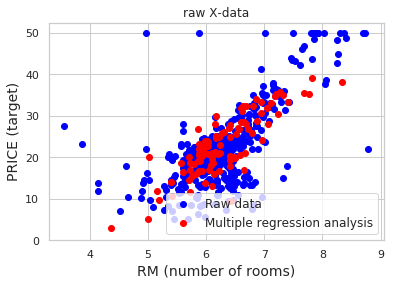

In [257]:
plt.figure(1)
plt.title('raw X-data')
plt.xlabel('RM (number of rooms)', fontsize=14)
plt.ylabel('PRICE (target)', fontsize=14)
plt.scatter(X_train['RM'], Y_train, c='blue', label='Raw data')
plt.scatter(X_test['RM'],clf1.predict(X_test), c='red', label='Multiple regression analysis')
plt.legend(loc='lower right', fontsize=12)
#

### In the previous experiment, we use all columns.
### So, we can reduce Multicollinearity and improve the score.

# LinearRegression (without AGE and TAX)

In [258]:
clf2 = linear_model.LinearRegression()
columns = ['AGE','TAX']
train2 = train.copy()
test2 = test.copy()
train2 = train2.drop(columns,axis = 1)
test2 = test2.drop(columns,axis = 1)
X_train2 = train2.drop('PRICE',axis = 1)
X_test2 = test2.drop('PRICE',axis = 1)
Y_train2 = train2['PRICE']
Y_test2 = test2['PRICE']

In [259]:
clf2.fit(X_train2,Y_train2)
print(clf2.intercept_) # intercept
print(clf2.score(X_test2,Y_test2)) # R^2

35.748316422046344
0.6509640552994899


# What we can learn from the graph
# 1 Logarithm
By the way let's see the graphs.

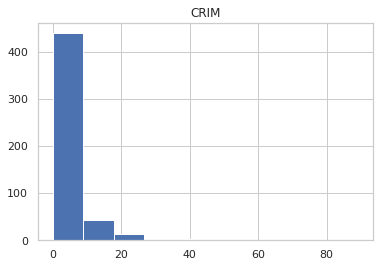

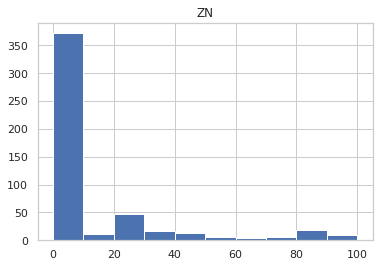

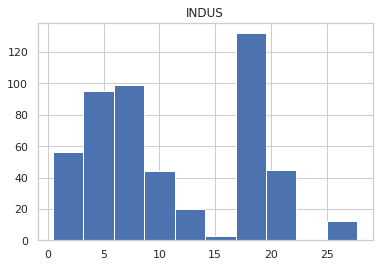

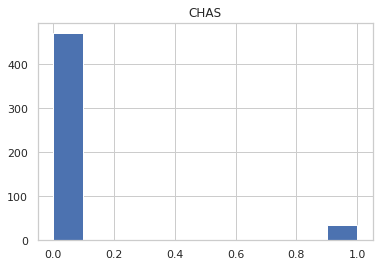

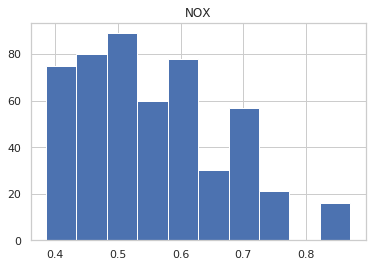

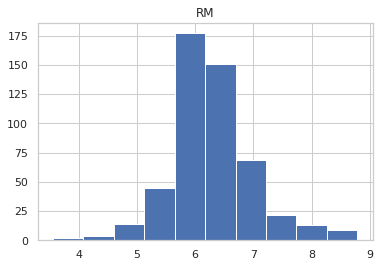

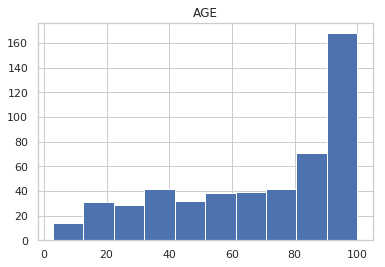

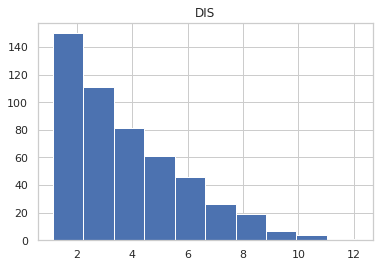

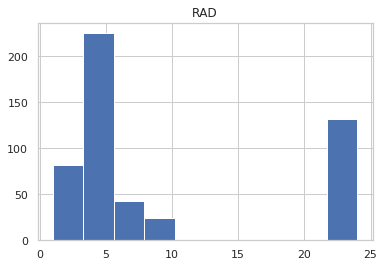

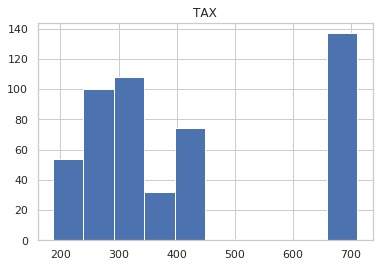

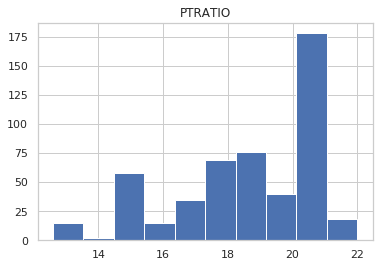

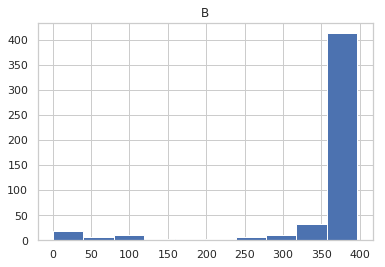

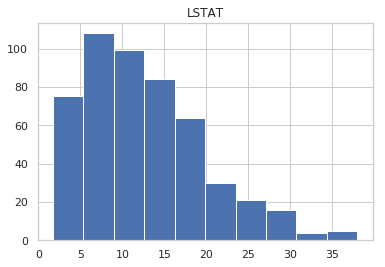

In [260]:
sns.set(style="whitegrid")
plt.subplot()
for col in numerical_feats:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

Some of graph looks not good, for example CRIM, DIS and so on.
So let use log for them.

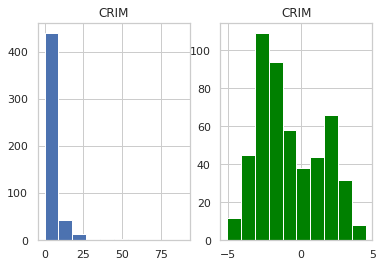

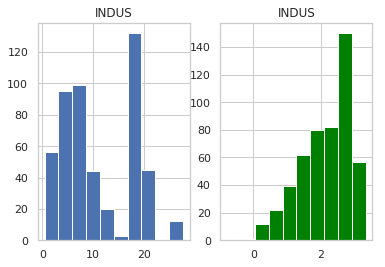

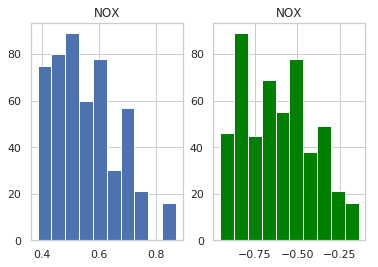

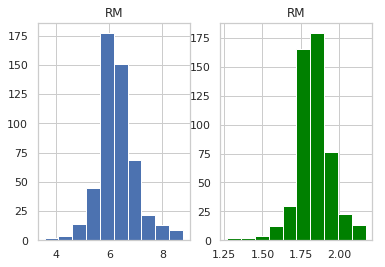

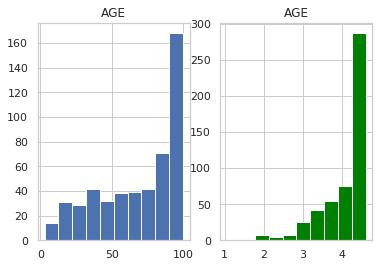

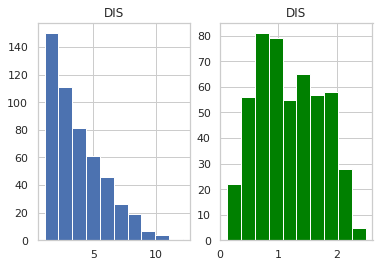

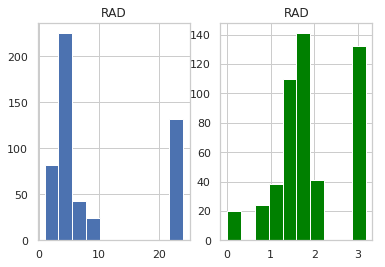

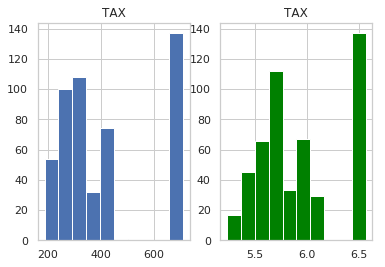

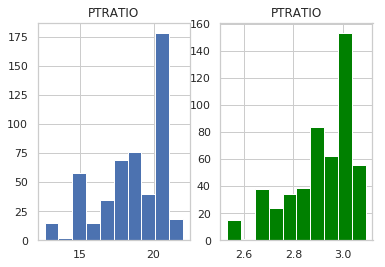

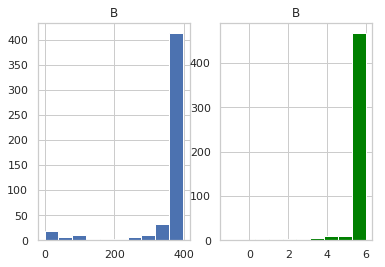

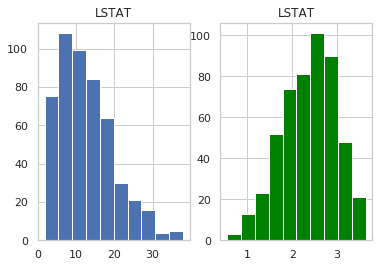

In [261]:
plt.subplot()
for col in numerical_feats:
    if not ((df[col] == 0).sum()):  
        plt.subplot(1,2,1)
        plt.hist(df[col])
        plt.title(col)
        plt.subplot(1,2,2)
        plt.hist(np.log(df[col]),color='green')
        plt.title(col)
        plt.show()

That's great!
CRIM and DIS become better.

In [262]:
clf3 = linear_model.LinearRegression()
train3,test3 = train.copy(),test.copy()
train3['CRIM'] = np.log(train['CRIM'])
train3['DIS'] = np.log(train['DIS'])
test3['CRIM'] = np.log(test['CRIM'])
test3['DIS'] = np.log(test['DIS'])

X_train3 = train3.drop('PRICE',axis = 1)
X_test3 = test3.drop('PRICE',axis = 1)
Y_train3 = train3['PRICE']
Y_test3 = test3['PRICE']

In [263]:
clf3.fit(X_train3,Y_train3)
print(clf3.intercept_) # intercept
print(clf3.score(X_test3,Y_test3)) # R^2

45.679167529666216
0.6805098327081167


# What we can learn from the graph
# 2 Binarization
From the graph, we can also find that CHAS and ZN is very parse.
So apply binarization, and convert to (0,1)

In [264]:
from sklearn.preprocessing import Binarizer
clf4 = linear_model.LinearRegression()
train4,test4 = train.copy(),test.copy()
train4.loc[train4['ZN']<10,'ZN'] = 0
train4.loc[train4['ZN']>=10,'ZN'] = 1
train4.loc[train4['B']<200,'B'] = 0
train4.loc[train4['B']>=200,'B'] = 1
test4.loc[test4['ZN']<10,'ZN'] = 0
test4.loc[test4['ZN']>=10,'ZN'] = 1
test4.loc[test4['B']<200,'B'] = 0
test4.loc[test4['B']>=200,'B'] = 1

X_train4 = train4.drop('PRICE',axis = 1)
X_test4 = test4.drop('PRICE',axis = 1)
Y_train4 = train4['PRICE']
Y_test4 = test4['PRICE']


In [265]:
clf4.fit(X_train4,Y_train4)
print(clf4.intercept_) # intercept
print(clf4.score(X_test4,Y_test4)) # R^2

38.076491787803135
0.6716115391811014


In [266]:
clf1.fit(X_train,Y_train)
# print(clf1.intercept_) # 
print(clf1.score(X_test,Y_test)) # R^2

clf2.fit(X_train2,Y_train2)
# print(clf2.intercept_) # intercept
print(clf2.score(X_test2,Y_test2)) # R^2

clf3.fit(X_train3,Y_train3)
# print(clf3.intercept_) # intercept
print(clf3.score(X_test3,Y_test3)) # R^2

clf4.fit(X_train4,Y_train4)
# print(clf4.intercept_) # intercept
print(clf4.score(X_test4,Y_test4)) # R^2

0.6576538041495668
0.6509640552994899
0.6805098327081167
0.6716115391811014


# Get the average score
Get the average score of each way,
In this experiment, I try 2000 times.

In [268]:
C1,C2,C3,C4,C5 = [],[],[],[],[]
for i in range(2000):
    train ,test = train_test_split(df, test_size=0.2)
    #######First
    clf1 = linear_model.LinearRegression()
    X_train = train.drop('PRICE',axis = 1)
    X_test = test.drop('PRICE',axis = 1)
    Y_train = train['PRICE']
    Y_test = test['PRICE']
    clf1.fit(X_train,Y_train)
    C1.append(clf1.score(X_test,Y_test))

    #######Second
    clf2 = linear_model.LinearRegression()
    columns = ['AGE','TAX']
    train2 = train.copy()
    test2 = test.copy()
    train2 = train2.drop(columns,axis = 1)
    test2 = test2.drop(columns,axis = 1)
    
    X_train2 = train2.drop('PRICE',axis = 1)
    X_test2 = test2.drop('PRICE',axis = 1)
    Y_train2 = train2['PRICE']
    Y_test2 = test2['PRICE']

    clf2.fit(X_train2,Y_train2)
    C2.append(clf2.score(X_test2,Y_test2)) # R^2

    #######Third
    clf3 = linear_model.LinearRegression()
    train3,test3 = train.copy(),test.copy()
    train3['CRIM'] = np.log(train['CRIM'])
    train3['DIS'] = np.log(train['DIS'])
    test3['CRIM'] = np.log(test['CRIM'])
    test3['DIS'] = np.log(test['DIS'])

    X_train3 = train3.drop('PRICE',axis = 1)
    X_test3 = test3.drop('PRICE',axis = 1)
    Y_train3 = train3['PRICE']
    Y_test3 = test3['PRICE']

    clf3.fit(X_train3,Y_train3)
    C3.append(clf3.score(X_test3,Y_test3)) # R^2

    ########Fourth
    clf4 = linear_model.LinearRegression()
    train4,test4 = train.copy(),test.copy()
    train4.loc[train4['ZN']<10,'ZN'] = 0
    train4.loc[train4['ZN']>=10,'ZN'] = 1
    train4.loc[train4['B']<200,'B'] = 0
    train4.loc[train4['B']>=200,'B'] = 1
    test4.loc[test4['ZN']<10,'ZN'] = 0
    test4.loc[test4['ZN']>=10,'ZN'] = 1
    test4.loc[test4['B']<200,'B'] = 0
    test4.loc[test4['B']>=200,'B'] = 1

    X_train4 = train4.drop('PRICE',axis = 1)
    X_test4 = test4.drop('PRICE',axis = 1)
    Y_train4 = train4['PRICE']
    Y_test4 = test4['PRICE']
    clf4.fit(X_train4,Y_train4)
    C4.append(clf4.score(X_test4,Y_test4)) # R^2

    ########Fifth
    clf5 = linear_model.LinearRegression()
    train5,test5 = train.copy(),test.copy()
    
    train5 = train5.drop(columns,axis = 1)
    test5 = test5.drop(columns,axis = 1)
    
    train5['CRIM'] = np.log(train['CRIM'])
    train5['DIS'] = np.log(train['DIS'])
    test5['CRIM'] = np.log(test['CRIM'])
    test5['DIS'] = np.log(test['DIS'])
    
    train5.loc[train5['ZN']<10,'ZN'] = 0
    train5.loc[train5['ZN']>=10,'ZN'] = 1
    train5.loc[train5['B']<200,'B'] = 0
    train5.loc[train5['B']>=200,'B'] = 1
    test5.loc[test5['ZN']<10,'ZN'] = 0
    test5.loc[test5['ZN']>=10,'ZN'] = 1
    test5.loc[test5['B']<200,'B'] = 0
    test5.loc[test5['B']>=200,'B'] = 1

    X_train5 = train5.drop('PRICE',axis = 1)
    X_test5 = test5.drop('PRICE',axis = 1)
    Y_train5 = train5['PRICE']
    Y_test5 = test5['PRICE']
    clf5.fit(X_train5,Y_train5)
    C5.append(clf5.score(X_test5,Y_test5)) # R^2
    
print('Basic Model')
print(sum(C1)/2000)
print('Model with fewer columns')
print(sum(C2)/2000)
print('Logarithm')
print(sum(C3)/2000)
print('Binarization')
print(sum(C4)/2000)
print('2+3+4 ways')
print(sum(C5)/2000)

Basic Model
0.7128155107580243
Model with fewer columns
0.7090515826602085
Logarithm
0.7224802899342827
Binarization
0.7075159340650856
2+3+4 ways
0.7155908592552551


# Summary
We can learn the effect of Multicollinearity and various techniques to improve score.

Next time, I want to know which columns should be remained or removed.